# Homework 07: The Normal Distribution, The Central Limit Theorem, Confidence Intervals
***

**Name**: CJ Kennedy

***

This assignment is due on Canvas by **6:00PM on Friday October 28**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

For this HW you will want to import a few of the usuals:

In [1]:
# Per the standard import pandas as 'pd' and numpy as 'np'
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline 
import scipy.stats as stats
from scipy.stats import norm

# Problem 1
***
We are going to look at some data from an insurance company that insures teenage drivers. `insurance.csv` is a sample of 1000 males and 1000 females all of whose ages are between 16 and 19 inclusive.

This insurance company has decided to use 'sex' as a proxy for deciding how large of a premium to charge for car insurance.

Read in the csv file `insurance.csv`.

### Part A
***(1 point)*** Load the `csv` file into a dataframe and call it `dfInsurance`:

In [22]:
# Read 'insurance' into dfInsurance
dfInsurance = pd.read_csv("insurance.csv") 

### Part B
***(1 point)*** Take a look at the data.

In [3]:
# Take a look at the data here:
dfInsurance

,Sex,miles driven,Age,Citations
0,F,4200.826390,18,0
1,F,5468.727014,17,0
2,F,5282.253745,18,0
3,F,5060.526521,17,0
4,F,5101.878224,16,2
...,...,...,...,...
1995,M,8433.768080,17,1
1996,M,8047.929523,18,1
1997,M,7285.647012,18,1
1998,M,8579.702457,18,0


### Data Description:

This data contains records from a number of teenage drivers. The drivers were observed for 12 months and the number of miles they drove and the number of citations they received were recorded. Citations were for wreckless driving, disobeying traffic laws, speeding, and/or accidents.

$\color{red}{\text{Sex}}$ - This is the sex of the driver.

$\color{red}{\text{miles driven}}$ - This is the number of miles driven during the observation period.

$\color{red}{\text{Age}}$ - This is the age of the driver at the beginning of the observation period.

$\color{red}{\text{Citations}}$ - This is the number of citations received by the driver.


### Part C
***(2 points)*** Which sex has more overall citations?

In [27]:
# Code here to print your answer:
# sum citations
count_1 = dfInsurance.loc[dfInsurance['Sex'] == 'M','Citations'].sum()
count_2 = dfInsurance.loc[dfInsurance['Sex'] == 'F','Citations'].sum()
print("Males have",count_1,"citations while females have",count_2,"citations.")
print("Therefore, males have more overall citations.")

Males have 468 citations while females have 397 citations.
Therefore, males have more overall citations.


### Part D
***(2 points)*** Find the mean number of citations received by males and the mean number of citations received by females. Who received more citations in the year?


In [28]:
#Code your answer here:
# print both means
male_mean = dfInsurance.loc[dfInsurance['Sex'] == 'M','Citations'].mean()
female_mean = dfInsurance.loc[dfInsurance['Sex'] == 'F','Citations'].mean()
print("Males have a mean of",male_mean,"citations while females have a mean of ",female_mean,"citations.")
print("In this dataset, the mean number of *male* citations received was higher.")

Males have a mean of 0.468 citations while females have a mean of  0.397 citations.
In this dataset, the mean number of *male* citations received was higher.


### Part E
***(3 points)*** Estimate the difference in population means (for citations received) by creating a 95% CI for the difference between the sample means for number of citations received by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

In [31]:
# Code your answer here:
# get data
x = dfInsurance.loc[dfInsurance['Sex'] == 'M','Citations']
y = dfInsurance.loc[dfInsurance['Sex'] == 'F','Citations']
# calculate mean, standard deviation, and count
X = male_mean # male mean
Y = female_mean # female mean
std1 = np.std(x) # male std
std2 = np.std(y) # female std
m = dfInsurance.loc[dfInsurance['Sex'] == 'M','Citations'].count()
n = dfInsurance.loc[dfInsurance['Sex'] == 'F','Citations'].count()
z = 1.96
b1 = X-Y+z*np.sqrt((std1**2)/m + (std2**2)/n) # bound 1
b2 = X-Y-z*np.sqrt((std1**2)/m + (std2**2)/n) # bound 1
print("The difference in population means with a 95% CI gives [",np.round(b2,5),",",np.round(b1,5),"]")

The difference in population means with a 95% CI gives [ 0.00287 , 0.13913 ]


### Part F
***(1 point)*** Is 0 inside the confidence interval? Describe the meaning of your results.


Solution here:
The bounds of the interval are [ -0.03273 , 0.17473 ]. So, 0 IS included inside the confidence interval. We would then conclude that number of citations received is no different, on average, than citations received by females. We could first say males receive, on average, 0.174 more citations per year than males. Or, females on average receive 0.033 more citations.


### Part G
***(4 points)*** Compare the number of miles driven per year by each sex. Start by getting a visual representation of the number of miles driven by each sex. Graph both male and female 'miles driven' distributions in the same frame for comparison.


Total miles driven by males: 8508075.4
Total miles driven by females: 5216558.5


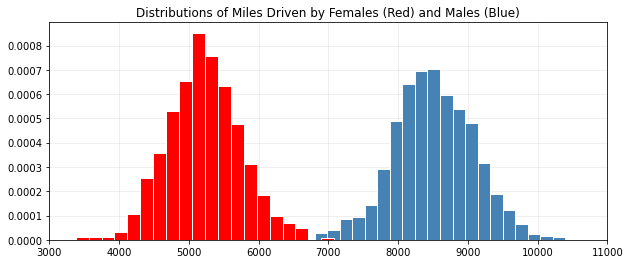

In [7]:
# Code your answer here:
#1 get sum of miles driven
num_male = dfInsurance.loc[dfInsurance['Sex'] == 'M','miles driven'].sum()
num_female = dfInsurance.loc[dfInsurance['Sex'] == 'F','miles driven'].sum()
print("Total miles driven by males:",np.round(num_male,1))
print("Total miles driven by females:",np.round(num_female,1))
#2 plotting adapted from nb12
z1 = dfInsurance.loc[dfInsurance['Sex'] == 'M','miles driven']
z2 = dfInsurance.loc[dfInsurance['Sex'] == 'F','miles driven']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
   #initialize the axis and frame for your picture
pd.Series(z1).hist(ax=ax, bins=20, color="steelblue", density=True, edgecolor="white")
pd.Series(z2).hist(ax=ax, bins=20, color="red", density=True, edgecolor="white")

ax.set_title("Distributions of Miles Driven by Females (Red) and Males (Blue)")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
#plt.xticks(range(-10,10+1));
ax.set_xlim([3000,11000]);
#ax.set_ylim([0,.5]);


### Part H
***(1 point)*** Based on the distributions, who appears to drive more miles in a year? Is there any overlap of histograms? Describe what you have found.


Solution: 

The female distribution of miles driven every year (in red) is compared to the equivalent male distribution (in blue). The middle of the blue distribution is around 8500 and doesnt go much below 7000. The female distribution sees little significance past 7000. Thus, there is little overlap. So, we could conclude for the data, males drive more miles per year.

### Part I
***(2 points)*** What is the difference in mean miles driven by the two groups (male and female)?

In [8]:
# Code solution here:
# get means
male_mean = dfInsurance.loc[dfInsurance['Sex'] == 'M','miles driven'].mean()
female_mean = dfInsurance.loc[dfInsurance['Sex'] == 'F','miles driven'].mean()
print("Males drive a mean miles of",male_mean,"while females drive",female_mean,"miles.")
# print difference
diff = np.round(male_mean-female_mean,2)
print("The difference in mean miles driven is",diff,"miles.")

Males drive a mean miles of 8508.07537070199 while females drive 5216.558464690003 miles.
The difference in mean miles driven is 3291.52 miles.


### Part J
***(3 points)*** Estimate the difference in population means (for miles driven) by creating a 95% CI for the difference between the sample means for 'miles driven' by males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.

In [9]:
# Code solution here:
# get data
x = dfInsurance.loc[dfInsurance['Sex'] == 'M','miles driven']
y = dfInsurance.loc[dfInsurance['Sex'] == 'F','miles driven']
# calculations
X = np.mean(x) # male mean
Y = np.mean(y) # female mean
std1 = np.std(x) # male std
std2 = np.std(y) # female std
# lengths
m = len(x)
n = len(y)
z = 1.96
# interval calculation
b1 = X-Y+z*np.sqrt(std1**2/m + (std2**2)/n) # bound 1
b2 = X-Y-z*np.sqrt(std1**2/m + (std2**2)/n) # bound 1
print("The difference in population means (for miles driven) with a 95% CI gives [",np.round(b2,5),",",np.round(b1,5),"]")

The difference in population means (for miles driven) with a 95% CI gives [ 3243.63249 , 3339.40132 ]


### Part K
***(1 points)*** Is 0 in the interval? Describe your findings.

Solution:
The bounds of the confidence interval is [ 3243.63249 , 3339.40132 ] which does NOT include 0. So we can say the following for the dataset. On average, males drive more miles every year than females by somewhere between 3244 and 3339 miles.


### Part L
***(4 points)*** Create a column called 'CPM'(this acronym stands for citations per 1000 miles), and put in it the number of citations divided by the number of miles driven (multiplied by 1000). The multiplication by 1000 ensures we are looking at citations per 1000 miles. This is done because the numbers are so small.

After you create the 'CPM' column look at the tail of the dataframe.

In [10]:
# Code your solution here:
dfInsurance['CPM'] = dfInsurance['Citations']/dfInsurance['miles driven']*1000
dfInsurance.tail()

,Sex,miles driven,Age,Citations,CPM
1995,M,8433.768080,17,1,0.118571
1996,M,8047.929523,18,1,0.124256
1997,M,7285.647012,18,1,0.137256
1998,M,8579.702457,18,0,0.000000
1999,M,7868.067827,16,0,0.000000


### Part M
***(2 points)*** Look at the difference in means for male CPM and female CPM. Which sex receive more citations per 1000 miles?

In [11]:
# Code solution here:
x = dfInsurance.loc[dfInsurance['Sex']=='M','CPM'] # male data
y = dfInsurance.loc[dfInsurance['Sex']=='F','CPM'] # female data
X = np.mean(X) # male CPM mean
Y = np.mean(Y) # female CPM mean
print("The mean female CPM:",np.round(Y,4))
print("The mean male CPM:",np.round(X,4))
print("Per 1000 miles, females received more citations")

The mean female CPM: 5216.5585
The mean male CPM: 8508.0754
Per 1000 miles, females received more citations


### Part N
***(1 point)*** You should have discovered that females get more citations per mile than do males. How does this go together with the fact that males get more citations in a year?

Solution:

After completing part G and H, we learned males drive more miles than woman. While men may have more citations (in the dataset), they also drive more miles. So accounting for that in the "per mile" analysis, we see how females receive more citations.

### Part O
***(3 points)*** Estimate the difference in population means (for CPM's) by creating a 95% CI for the difference between the sample means for 'CPM' for males and females.

Recall the equation below from lecture. Perform the proper calculations 'by hand' (i.e. code without a canned function).

$\bar{X}-\bar{Y}\pm Z_{\frac{\alpha}{2}}\cdot\sqrt{\frac{\sigma_1^2}{m}+\frac{\sigma_2^2}{n}}$

Create a 95% CI for the difference in miles driven per year.


In [12]:
# Code solution here:
# continue code from part M
std1 = np.std(x) # male std
std2 = np.std(y) # female std
m = len(x)
n = len(y)
z = 1.96 # 95% CI corresponding value
# interval bounds
b1 = X-Y+z*np.sqrt(std1**2/m + (std2**2)/n) # bound 1
b2 = X-Y-z*np.sqrt(std1**2/m + (std2**2)/n) # bound 1
print("The difference in population means (for citations per mile) with a 95% CI gives [",np.round(b2,5),",",np.round(b1,5),"]")

The difference in population means (for citations per mile) with a 95% CI gives [ 3291.50608 , 3291.52773 ]


### Part P
***(1 point)*** Does your result contain 0? Describe your findings.

Solution:

The bounds for the interval was [ -0.03248 , -0.01084 ] which does not include 0. So, we could either say men receive 0.01084 less citations per mile than woman or females receive 0.03248 more citations per mile than woman. We can guarantee the difference to be somewhere between these bounds with 95% confidence.


### Part Q
***(1 point)*** Can you explain why males pay higher insurance premiums when they receive fewer citations per mile? Hint: is insurance typically sold by the mile or by the year?

Solution:

We have concluded in parts G-H that males in this dataset drive more miles per year than woman. Thus, there are more opportunities for insurance to need to cover some accident. These accidents arrise when driver mistakes are made. Citations somewhat quantify driver mistakes. So, males having more citations and miles driven influences higher premiums.

### Part R
***(2 points)*** Consider the graphic below. It is merely a cut-and-past .png, it isn't live code.

Look at the code and the graphic and describe what story it tells.

![title](code.png)
![title](graph.png)

In [13]:
# The graphic above was created with this code.
# Of course this code will likely not work in your notebook since
# you have different variable names. This is why it is commented out.

#mCPM = dfInsurance.loc[dfInsurance['Sex']=='M', 'CPM'].values
#fCPM = dfInsurance.loc[dfInsurance['Sex']=='F', 'CPM'].values

#bins = np.linspace(0.001, 0.6, 8)
#plt.hist([mCPM, fCPM], bins, label=['male', 'female'])
#plt.legend(loc='upper right')
#plt.show()

Solution:

Lines 2 and 3 create variables for all the male and female citations per mile. Line 5 specifies the bins range and spacing. Line 6 plots a histogram of the CPMs for both sets of data while line 7-8 formats. 

In the plot, we see the frequency of certain CPMs ranging from 0.1 to 0.6. The most frequent CPM for the male dataset was 0.1 while it was 0.2 for the females. The next most frequent CPM for the males was 0.2; the rest of the male data (.3 and .4) is way less frequenty. For females, there are more extreme CPMs of 0.5 and 0.6 but are way less frequenty than the 0.2. 

Females have a wider distribution of CPMs than males to while also more frequently having higher CPMs.

### Part S
***(5 points)*** What percent of males drive between 6400 and 8400 miles per year?
What percent of females drive that same amount?


In [14]:
# Code your solution here:
# calc total count of miles driven 
x = dfInsurance.loc[(dfInsurance['Sex']=='M') & (dfInsurance['miles driven'] > 6400) & (dfInsurance['miles driven'] < 8400),'miles driven'].count() # 3 conditionals
y = dfInsurance.loc[(dfInsurance['Sex']=='F') & (dfInsurance['miles driven'] > 6400) & (dfInsurance['miles driven'] < 8400),'miles driven'].count() # 3 conditionals

n = len(dfInsurance.loc[dfInsurance['Sex'] == 'M']) # total males
m = len(dfInsurance.loc[dfInsurance['Sex'] == 'F']) # total females

print(np.round(x/n,3)*100,"% of males driven between 6400 and 8400 miles every year")
print(np.round(100*y/m,3),"% of females driven between 6400 and 8400 miles every year")

43.1 % of males driven between 6400 and 8400 miles every year
1.7 % of females driven between 6400 and 8400 miles every year


### Part T
***(4 points)*** 95% of females drive less than x miles. What is x?

In [15]:
# Code your solution here:
y = (dfInsurance.loc[dfInsurance['Sex'] == 'F','miles driven' ]) # data
m = len(dfInsurance.loc[dfInsurance['Sex'] == 'F']) # total females
mu = np.mean(y) # mean
sigma = (np.std(y)) # standard deviation
x = norm.ppf(.95,loc=mu,scale=sigma) # ppf with custom mu,sigma
print("P( Y \u2264 x) = .95 \n x = {:.2f}".format(x),"miles")

# verification with actual data
count = 0
for i in range(0,m):
    if(y[i]>=x):
        count = count + 1
print()
print("Actual percent of females driving less than 6071 miles is:")
print(1-count/m)

P( Y ≤ x) = .95 
 x = 6071.27 miles

Actual percent of females driving less than 6071 miles is:
0.948


# Problem 2
***

Let $X$ be a normal random variable, $X \sim N(\mu, \sigma^2) = N(5,9)$.

Let $Z$ be a $\color{red}{\text{standard}}$ normal random variable, $Z \sim N(\mu, \sigma^2) = N(0,1)$.


### Part A

***(2 points)*** Compute $P(X \leq 8.75)$.

In [16]:
# Code your solution here:
mu = 5
sigma = 3
z = 8.75
distribution = norm.cdf(z,loc=mu,scale=sigma)
print("P( Z \u2264 8.75) = {:.3f}".format(distribution))

P( Z ≤ 8.75) = 0.894


### Part B

***(2 points)*** Compute $P(Z\leq 1.25)$.

In [17]:
# Code your solution here:
z = 1.25
print("P( Z \u2264 1.25) = {:.3f}".format(norm.cdf(z)))

P( Z ≤ 1.25) = 0.894


### Part C

***(2 points)*** Explain why the answer to these first two questions are the same.

Solution:

The first normal distribution is scaled by 3 since the standard deviation is 3 (as opposed to 1). This would have the effect: 1.25*3 = 3.75.

Then, the first distribution is shifted by 5 (because of the mean being 5 as opposed to 0). This would then have the effect: 3.75 + 5 = 8.75.
